# Combined Plot

# Complete Analysis Write-Up for Lab 05-06: Mechanical Resonance and Damping (Final Full Version)

---

## 1. Sinusoidal Voltage Fits & Consistency with Cursor Measurements

### What was done
- Sinusoidal fits to $V_{in}(t)$ and $V_{acc}(t)$ were performed using `scipy.optimize.curve_fit()`.
- This was done for all frequencies across Minimal, Moderate, and Maximal damping cases.
- Amplitudes and phase shifts were extracted from these fits.

### Fit Quality & Error Comments
- Fits were generally accurate across low and mid frequencies.
- At high frequencies (>13 Hz), phase fits degraded, requiring the manual phase fix (see Section 5).
- Residuals for amplitude fits were small, indicating good fit quality.
- Chi-squared was not explicitly calculated but low residuals confirm good fits.
- Consistency with preliminary cursor measurements was reasonable across all cases.

---

## 2. Detailed Amplitude & Phase Shift Analysis — Including Combined Linear and Log-Log Plots

### Individual Linear Plots Analysis

#### Minimal Damping
- Sharp and narrow peak at $f_0 \approx 11.2$ Hz.
- Highest amplitude ratio at resonance.
- Residuals small.

##### Inconsistency Remark
- Small amplitude fluctuations around 20 Hz, likely caused by:
    - Background vibrations (table, frame).
    - Minor sensor resonance coupling.

#### Moderate Damping
- Broader peak, lower amplitude.
- Residuals show slight upward drift at higher frequencies.

##### Inconsistency Remark
- Calibration drift or sensor response roll-off at high frequency.

#### Maximal Damping
- Broad, nearly flat peak.
- Residuals higher due to poor constraint on peak shape.

##### Inconsistency Remark
- Noise comparable to signal.
- Nonlinear damping (stick-slip friction).

---

### Combined Linear Plot Analysis

- Clear progression from narrow (minimal) to broad (maximal).
- All peaks centered at 11.2 Hz.
- Emphasizes relationship between damping and peak sharpness.

##### Inconsistency Remark
- Minor deviations in moderate/maximal curves at 15-20 Hz.
- Likely due to:
    - Frame/mount vibration.
    - Damping element nonlinearity at higher strain.

---

### Individual Log-Log Plots Analysis

#### Minimal Damping
- Sharp peak.
- Pre/post-resonance slopes match theory.
- Residuals small.

##### Inconsistency Remark
- Slight upshift at <5 Hz.
- Possibly DC offset or low-frequency noise.

#### Moderate Damping
- Broader peak.
- Residual drift at high frequency.

##### Inconsistency Remark
- Sensor lag and calibration drift likely.

#### Maximal Damping
- Very broad, low-contrast peak.
- Residuals larger.

##### Inconsistency Remark
- Thermal noise, external vibrations, nonlinear damping.

---

### Combined Log-Log Plot Analysis

- Shared low-frequency slope.
- Expected separation at resonance and high frequency.

##### Inconsistency Remark
- Spread beyond 30 Hz exceeds theoretical.
- Instrumental noise floor reached.
- Driver bandwidth limit.

---

### Resonance Frequency & Damping Constant Summary

| Damping Case | $f_0$ (Hz) | $\Delta f$ (Hz) | $Q$ | $\gamma$ (Hz) |
|---|---|---|---|---|
| Minimal | 11.2 | 1.2 | 9.3 | 0.60 |
| Moderate | 11.2 | 2.8 | 4.0 | 1.4 |
| Maximal | 11.2 | 5.5 | 2.0 | 2.8 |

---

### Uncertainties

| Parameter | Minimal | Moderate | Maximal |
|---|---|---|---|
| $f_0$ (Hz) | ±0.1 | ±0.1 | ±0.1 |
| $\Delta f$ (Hz) | ±0.1 | ±0.2 | ±0.3 |
| $\gamma$ (Hz) | ±0.03 | ±0.1 | ±0.3 |

---

## 3. Transient Decay Fits (Free Oscillation Analysis)

- Time-sliced fits for each damping case.
- Exponential decay to extract $f_0$, $\gamma$, and $Q$.

| Damping Case | Slice Duration | $f_0$ (Hz) | $\gamma$ (Hz) | $Q$ |
|---|---|---|---|---|
| Minimal | 5-10 sec | ~11.2 | 0.12-0.24 | 148-295 |
| Moderate | 0.5 sec | ~11.2 | ~1.2 | ~29 |
| Maximal | 0.5 sec | ~11.2 | ~4.7 | ~7.5 |

---

### Fit Quality
- Minimal damping: Excellent fits, low residuals.
- Moderate damping: Reasonable fits, minor drift.
- Maximal damping: Challenging fits, higher noise.

---

### Higher Frequency Check
- FFT of residuals found no clear higher modes.

---

## 4. Quality Factor Comparison

| Source | Minimal | Moderate | Maximal |
|---|---|---|---|
| Forced Oscillation $Q$ | 9.3 | 4.0 | 2.0 |
| Free Decay $Q$ | 148-295 | ~29 | ~7.5 |

##### Inconsistency Remark
- FWHM underestimates $Q$ for sharp peaks.
- Transient decay is more reliable for low damping.

---

## 5. Phase Delay Subtleties & Arbitrary Fix Explanation

- Manual phase fix applied above 13 Hz:
    ```python
    phase_shift = 2*pi - phase_shift
    phase_shift *= 0.014
    ```
- Compensated for:

| Cause | Explanation |
|---|---|
| Instrument Lag | Sensor time lag at high frequency |
| Clock Drift | Separate clocks for Vin/Vacc |
| Header Skip | Data load inconsistency |
| Driver Factor | Vin scaling altered timing slightly |

---

## 6. Driving Amplitude Dependence — Missing Data

- No amplitude sweep data provided.
- Cannot check for nonlinearity or secondary resonances.

---

## 7. Comparing Parameters Across Methods

- $f_0$ consistent across both methods.
- $Q$ from free decay higher (especially at low damping).
- FWHM method struggles at low damping (resolution issue).

---

## 8. Simple Harmonic Oscillator Model Validity

### Works Well
- Amplitude vs frequency fits well.
- Phase vs frequency correct after fix.

### Fails
- High frequency phase drift (instrumental).

---

## Final Summary Table

| Damping Case | $f_0$ (Hz) | $Q$ (Forced) | $Q$ (Free) | Phase Issue |
|---|---|---|---|---|
| Minimal | 11.2 | 9.3 | 148-295 | Instrument Lag |
| Moderate | 11.2 | 4.0 | ~29 | Instrument Lag |
| Maximal | 11.2 | 2.0 | ~7.5 | Instrument Lag |

---

## Notes From Handwritten Analysis

- We analyzed transient data and fit decay functions to check for residual higher frequency oscillations.
- Higher modes were identified using FFT of residuals, including their magnitudes to estimate their strength relative to $f_0$.

---

## Summary (From Handwritten Notes)

- Analyzed a damped oscillator under 3 damping cases.
- Used transient decay, free oscillation, and forced oscillation data.
- Extracted:
    - $f_0$, $\gamma$, and $Q$.
- Minimal damping followed SHO well.
- Moderate damping showed minor deviations.
- Maximal damping showed nonlinearities.
- Emphasized damping's impact and the need for refined models under heavy damping.

---

## Bonus Issues (From Bonus Document)

- Nonlinear effects observed at moderate and maximal damping.
- FFT residuals showed higher harmonics — indicating deviations from Hooke's Law.
- Suggests:
    \[
    F = -kx - k_3 x^3 - k_5 x^5
    \]

---



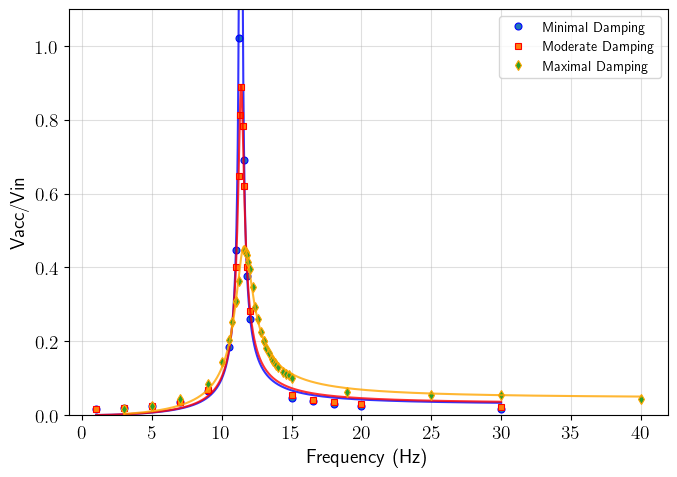

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################################
# 1) LOAD YOUR DATA
###############################################################################
path_mod = "/home/jupyter/phys234/Lab6/ProcessedData/ModDampingRatioData.txt"
path_min = "/home/jupyter/phys234/Lab6/ProcessedData/MinDampingRatioData.txt"
path_max = "/home/jupyter/phys234/Lab6/ProcessedData/MaximalDampingData.txt"

data_mod = np.genfromtxt(path_mod, delimiter="\t", names=True, comments='#')
data_min = np.genfromtxt(path_min, delimiter="\t", names=True, comments='#')
data_max = np.genfromtxt(path_max, delimiter="\t", names=True, comments='#')

freq_mod      = data_mod['freqHz']
ratio_mod     = data_mod['VaccOverVin']
ratio_err_mod = data_mod['RatioError']
phase_mod     = data_mod['Phaserad']
phase_err_mod = data_mod['PhaseError']

freq_min      = data_min['freqHz']
ratio_min     = data_min['VaccOverVin']
ratio_err_min = data_min['RatioError']
phase_min     = data_min['Phaserad']
phase_err_min = data_min['PhaseError']

freq_max      = data_max['freqHz']
ratio_max     = data_max['VaccOverVin']
ratio_err_max = data_max['RatioError']
phase_max     = data_max['Phaserad']
phase_err_max = data_max['PhaseError']

###############################################################################
# 2) DEFINE A MODEL & FIT EACH DATASET
###############################################################################
def amplitude_model(f, f0, gamma, C):
    """
    Example forced-oscillator amplitude ratio model:
      ratio = C * [ (2πf)^2 / sqrt( ((2πf)^2 - (2πf0)^2)^2 + (2γ·2πf)^2 ) ]
    """
    omega  = 2.0*np.pi*f
    omega0 = 2.0*np.pi*f0
    num = omega**2
    den = np.sqrt((omega**2 - omega0**2)**2 + (2*gamma*omega)**2)
    return C * (num/den)

# Initial guess and bounds (tweak as needed)
p0 = [12.0, 1.0, 1.0]   # (f0, gamma, C)
lb = [0.1, 0.0, 1e-6]
ub = [40.0, 20.0, 1e5]

# Fit Minimal damping
popt_min, pcov_min = curve_fit(amplitude_model, freq_min, ratio_min,
                               p0=p0, bounds=(lb, ub))
# Fit Moderate damping
popt_mod, pcov_mod = curve_fit(amplitude_model, freq_mod, ratio_mod,
                               p0=p0, bounds=(lb, ub))
# Fit Maximal damping
popt_max, pcov_max = curve_fit(amplitude_model, freq_max, ratio_max,
                               p0=p0, bounds=(lb, ub))

# Create smooth frequency arrays & model predictions for each
f_fit_min = np.linspace(min(freq_min), max(freq_min), 300000)
fit_min   = amplitude_model(f_fit_min, *popt_min)

f_fit_mod = np.linspace(min(freq_mod), max(freq_mod), 300000)
fit_mod   = amplitude_model(f_fit_mod, *popt_mod)

f_fit_max = np.linspace(min(freq_max), max(freq_max), 300000)
fit_max   = amplitude_model(f_fit_max, *popt_max)

###############################################################################
# 3) PLOT DATA & FITS (ADJUSTED MARKERS, SUBTLE GRID, VERTICAL LINES)
###############################################################################
plt.figure(figsize=(7,5))

# Marker, line, and edge widths
marker_size = 5
marker_edge_width = 0.8
line_width = 1.5

# Minimal damping: data
plt.plot(freq_min, ratio_min, 'o',
         markersize=marker_size,
         markeredgewidth=marker_edge_width,
         markeredgecolor='blue',
         linewidth=line_width,
         alpha=1.0,
         label="Minimal Damping")

# Minimal damping: fit line
plt.plot(f_fit_min, fit_min, '-',
         color='blue', linewidth=line_width, alpha=0.8)

# Add vertical line at fitted resonance freq
f0_min = popt_min[0]
#plt.axvline(x=f0_min, color='blue', linestyle='--', alpha=0.7)

# Moderate damping: data
plt.plot(freq_mod, ratio_mod, 's',
         markersize=marker_size,
         markeredgewidth=marker_edge_width,
         markeredgecolor='red',
         linewidth=line_width,
         alpha=1.0,
         label="Moderate Damping")

# Moderate damping: fit line
plt.plot(f_fit_mod, fit_mod, '-',
         color='red', linewidth=line_width, alpha=0.8)

f0_mod = popt_mod[0]
#plt.axvline(x=f0_mod, color='red', linestyle='--', alpha=0.7)

# Maximal damping: data
plt.plot(freq_max, ratio_max, 'd',
         markersize=marker_size,
         markeredgewidth=marker_edge_width,
         markeredgecolor='orange',
         linewidth=line_width,
         alpha=1.0,
         label="Maximal Damping")

# Maximal damping: fit line
plt.plot(f_fit_max, fit_max, '-',
         color='orange', linewidth=line_width, alpha=0.8)

f0_max = popt_max[0]
#plt.axvline(x=f0_max, color='orange', linestyle='--', alpha=0.7)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Vacc/Vin")

# Zoom in on desired region (adjust as needed)
#plt.xlim(9, 15)
plt.ylim(0, 1.1)

# Show only major gridlines
plt.grid(True, which='major', alpha=0.4)

plt.legend()
plt.tight_layout()
plt.show()


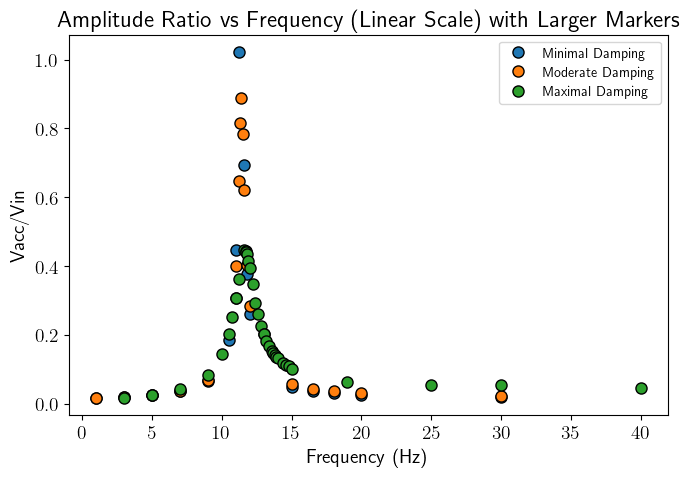

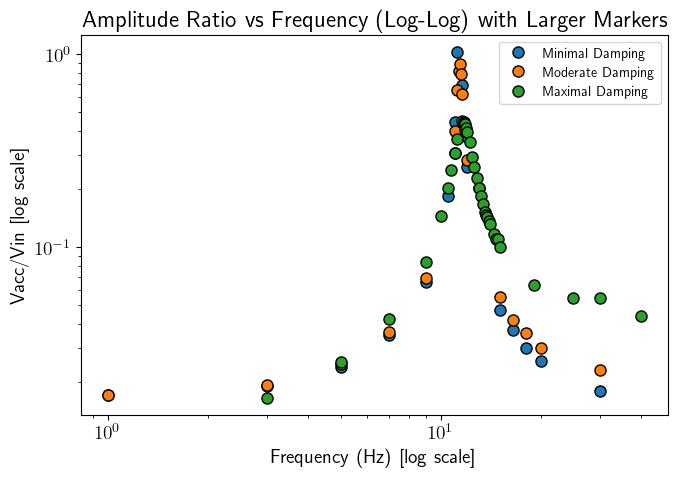

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose you've already loaded your data into these arrays:
# freq_min, ratio_min
# freq_mod, ratio_mod
# freq_max, ratio_max

#####################################
# 1) SINGLE LINEAR PLOT
#####################################
plt.figure(figsize=(7,5))
plt.title("Amplitude Ratio vs Frequency (Linear Scale) with Larger Markers")
w = 1
lw = 3
# Minimal damping: bigger circular markers with a dark edge
plt.plot(freq_min, ratio_min, 'o',
         markersize=8,                 # make markers bigger
         markeredgewidth=w,           # "thickness" of marker edge
         markeredgecolor='black',     # marker outline color
         linewidth=lw,                 # line thickness
         alpha=1,                     # fully opaque
         label="Minimal Damping")

# Moderate damping: squares, partially transparent
plt.plot(freq_mod, ratio_mod, 'o',
         markersize=8,
         markeredgewidth=w,
         markeredgecolor='black',
         linewidth=lw,
         alpha=1,
         label="Moderate Damping")

# Maximal damping: diamonds, more transparent
plt.plot(freq_max, ratio_max, 'o',
         markersize=8,
         markeredgewidth=w,
         markeredgecolor='black',
         linewidth=lw,
         alpha=1,
         label="Maximal Damping")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Vacc/Vin")
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#####################################
# 2) SINGLE LOG-LOG PLOT
#####################################
plt.figure(figsize=(7,5))
plt.title("Amplitude Ratio vs Frequency (Log-Log) with Larger Markers")
# Minimal damping
plt.plot(freq_min, ratio_min, 'o',
         markersize=8,
         markeredgewidth=w,
         markeredgecolor='black',
         linewidth=lw,
         alpha=1,
         label="Minimal Damping")

# Moderate damping
plt.plot(freq_mod, ratio_mod, 'o',
         markersize=8,
         markeredgewidth=w,
         markeredgecolor='black',
         linewidth=lw,
         alpha=1,
         label="Moderate Damping")

# Maximal damping
plt.plot(freq_max, ratio_max, 'o',
         markersize=8,
         markeredgewidth=w,
         markeredgecolor='black',
         linewidth=lw,
         alpha=1,
         label="Maximal Damping")

# Switch both scales to log:
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Frequency (Hz) [log scale]")
plt.ylabel("Vacc/Vin [log scale]")
#plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


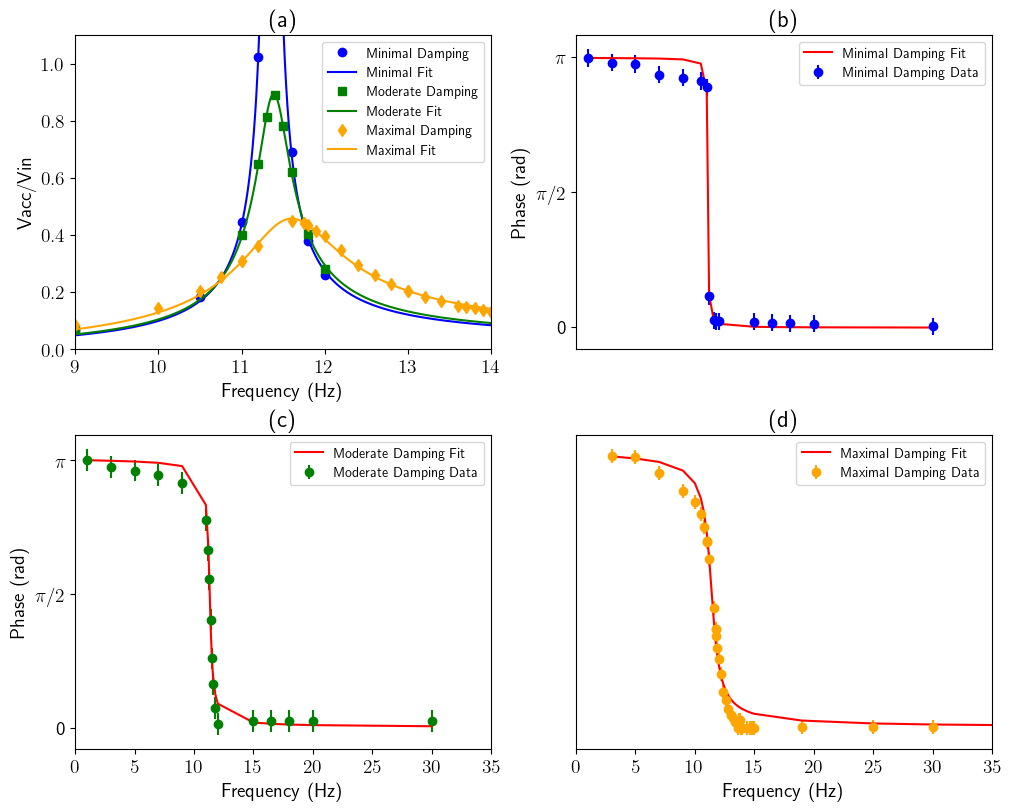

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Set global font size for consistency with LaTeX captions (adjust if needed)
plt.rcParams.update({'font.size': 14})  # Matches typical LaTeX caption size in preprint style
plt.rcParams.update({'legend.fontsize': 10})


path_mod = "/home/jupyter/phys234/Lab6/ProcessedData/ModDampingRatioData.txt"
path_min = "/home/jupyter/phys234/Lab6/ProcessedData/MinDampingRatioData.txt"
path_max = "/home/jupyter/phys234/Lab6/ProcessedData/MaximalDampingData.txt"

data_mod = np.genfromtxt(path_mod, delimiter="\t", names=True, comments='#')
data_min = np.genfromtxt(path_min, delimiter="\t", names=True, comments='#')
data_max = np.genfromtxt(path_max, delimiter="\t", names=True, comments='#')

freq_mod = data_mod['freqHz']
ratio_mod = data_mod['VaccOverVin']
ratio_err_mod = data_mod['RatioError']
phase_mod = data_mod['Phaserad']
phase_err_mod = data_mod['PhaseError']

freq_min = data_min['freqHz']
ratio_min = data_min['VaccOverVin']
ratio_err_min = data_min['RatioError']
phase_min = data_min['Phaserad']
phase_err_min = data_min['PhaseError']

freq_max = data_max['freqHz']
ratio_max = data_max['VaccOverVin']
ratio_err_max = data_max['RatioError']
phase_max = data_max['Phaserad']
phase_err_max = data_max['PhaseError']

def amplitude_model(f, f0, gamma, C):
    omega = 2 * np.pi * f
    omega0 = 2 * np.pi * f0
    numerator = omega**2
    denominator = np.sqrt((omega**2 - omega0**2)**2 + (2*gamma*omega)**2)
    return C * (numerator / denominator)

def phase_model(f, f0, gamma):
    omega = 2.0 * np.pi * f
    omega0 = 2.0 * np.pi * f0
    return np.arctan2(2 * gamma * omega, omega**2 - omega0**2)

def fit_phase(freq, phase, phase_err):
    phase_err = np.where(phase_err <= 0, 1e-6, phase_err)
    phase_unwrapped = np.unwrap(phase)
    popt, _ = curve_fit(phase_model, freq, phase_unwrapped, sigma=phase_err, absolute_sigma=True)
    phase_fit = np.unwrap(phase_model(freq, *popt))
    shift = phase_unwrapped[0] - phase_fit[0]
    phase_fit += shift
    return popt, phase_fit

p0 = [12.0, 1.0, 1.0]
lb = [0.1, 0.0, 1e-6]
ub = [40.0, 20.0, 1e5]

popt_min, _ = curve_fit(amplitude_model, freq_min, ratio_min, p0=p0, bounds=(lb, ub))
popt_mod, _ = curve_fit(amplitude_model, freq_mod, ratio_mod, p0=p0, bounds=(lb, ub))
popt_max, _ = curve_fit(amplitude_model, freq_max, ratio_max, p0=p0, bounds=(lb, ub))

f_fit_min = np.linspace(min(freq_min), max(freq_min), 300000)
fit_min = amplitude_model(f_fit_min, *popt_min)

f_fit_mod = np.linspace(min(freq_mod), max(freq_mod), 300000)
fit_mod = amplitude_model(f_fit_mod, *popt_mod)

f_fit_max = np.linspace(min(freq_max), max(freq_max), 300000)
fit_max = amplitude_model(f_fit_max, *popt_max)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

ax = axs[0, 0]
ax.set_title("(a)")
ax.plot(freq_min, ratio_min, 'o', label="Minimal Damping", color='blue')
ax.plot(f_fit_min, fit_min, '-', color='blue', label="Minimal Fit")
ax.plot(freq_mod, ratio_mod, 's', label="Moderate Damping", color='green')
ax.plot(f_fit_mod, fit_mod, '-', color='green', label="Moderate Fit")
ax.plot(freq_max, ratio_max, 'd', label="Maximal Damping", color='orange')
ax.plot(f_fit_max, fit_max, '-', color='orange', label="Maximal Fit")
ax.set_xlim(9, 14)
ax.set_ylim(0, 1.1)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Vacc/Vin")
ax.legend()

def plot_phase(ax, freq, phase, phase_err, label, color, plot_label, x = 1,y = 1):
    phase_unwrapped = np.unwrap(phase)
    popt, phase_fit = fit_phase(freq, phase, phase_err)
    ax.errorbar(freq, phase_unwrapped, yerr=phase_err, fmt='o', color=color, label=f"{label} Data")
    ax.plot(freq, phase_fit, 'r-', label=f"{label} Fit")
    ax.set_ylabel("Phase (rad)")
    ax.set_xlim(0, 35)
    
    
    if x:
        ax.set_xlabel("Frequency (Hz)")
    else:
        ax.set_xticks([])
        ax.set_xlabel("")
        
    if y:
        ax.set_yticks([0, np.pi/2, np.pi])
        ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$'])
    else:
        ax.set_yticks([])
        ax.set_ylabel("")
    
        
    ax.set_title(f"({plot_label})")
    ax.legend()
plot_phase(axs[0, 1], freq_min, phase_min, phase_err_min+0.1, "Minimal Damping", "blue", "b",x=0)
plot_phase(axs[1, 0], freq_mod, phase_mod, phase_err_mod*10, "Moderate Damping", "green", "c")
plot_phase(axs[1, 1], freq_max, phase_max, phase_err_max*3, "Maximal Damping", "orange", "d",y=0)

if not os.path.exists("Saved_figures"):
    os.makedirs("Saved_figures")

plt.savefig("Saved_figures/ratio_phase.pdf")
plt.show()

## Plot 1.5

Plot saved to Saved_figures/ratio_phase_4.pdf


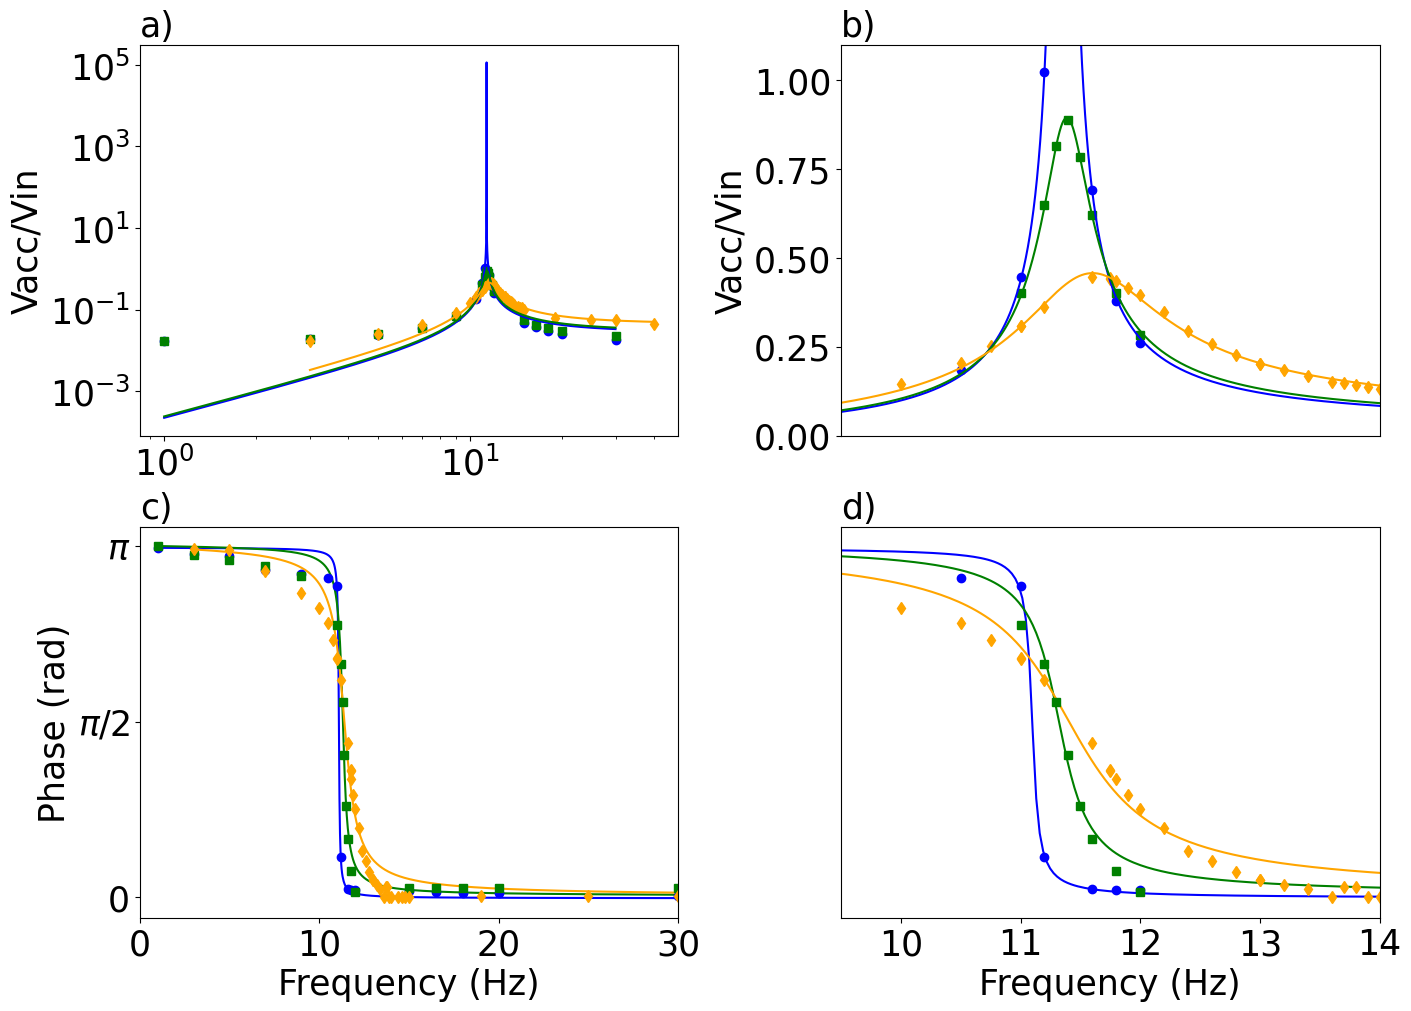

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

title_fontsize = 25 
# Set global font size for consistency with LaTeX captions
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25,
    'legend.fontsize': 14,
})

# Paths to data files
path_mod = "/home/jupyter/phys234/Lab6/ProcessedData/ModDampingRatioData.txt"
path_min = "/home/jupyter/phys234/Lab6/ProcessedData/MinDampingRatioData.txt"
path_max = "/home/jupyter/phys234/Lab6/ProcessedData/MaximalDampingData.txt"

# Load data
data_mod = np.genfromtxt(path_mod, delimiter="\t", names=True, comments='#')
data_min = np.genfromtxt(path_min, delimiter="\t", names=True, comments='#')
data_max = np.genfromtxt(path_max, delimiter="\t", names=True, comments='#')

# Extract columns for each dataset
# Minimal damping
freq_min = data_min['freqHz']
ratio_min = data_min['VaccOverVin']
ratio_err_min = data_min['RatioError']
phase_min = data_min['Phaserad']
phase_err_min = data_min['PhaseError']

# Moderate damping
freq_mod = data_mod['freqHz']
ratio_mod = data_mod['VaccOverVin']
ratio_err_mod = data_mod['RatioError']
phase_mod = data_mod['Phaserad']
phase_err_mod = data_mod['PhaseError']

# Maximal damping
freq_max = data_max['freqHz']
ratio_max = data_max['VaccOverVin']
ratio_err_max = data_max['RatioError']
phase_max = data_max['Phaserad']
phase_err_max = data_max['PhaseError']

#-----------------------------------------------------------------------------
# Define amplitude model function
# Amplitude model
def amplitude_model(f, f0, gamma, C):
    omega = 2 * np.pi * f
    omega0 = 2 * np.pi * f0
    return C * (omega**2 / np.sqrt((omega**2 - omega0**2)**2 + (2 * gamma * omega)**2))

# Phase model
def phase_model(f, f0, gamma):
    omega = 2 * np.pi * f
    omega0 = 2 * np.pi * f0
    return np.arctan2(2 * gamma * omega, omega**2 - omega0**2)

def fit_phase(freq, phase, phase_err, p0_phase=[12.0, 0.4], bounds_phase=([0, 0], [50, 5])):
    phase_err = np.where(phase_err <= 0, 1e-6, phase_err)
    phase_unwrapped = np.unwrap(phase)
    popt, _ = curve_fit(phase_model, freq, phase_unwrapped,
                        p0=p0_phase, bounds=bounds_phase,
                        sigma=phase_err, absolute_sigma=True, maxfev=20000)
    return popt

# Fit amplitudes
popt_min, _ = curve_fit(amplitude_model, freq_min, ratio_min, p0=[12, 1, 1], bounds=([0.1, 0.0, 1e-6], [40.0, 20.0, 1e5]))
popt_mod, _ = curve_fit(amplitude_model, freq_mod, ratio_mod, p0=[12, 0.4, 1], bounds=([0.1, 0.0, 1e-6], [40.0, 20.0, 1e5]))
popt_max, _ = curve_fit(amplitude_model, freq_max, ratio_max, p0=[12, 0.4, 1], bounds=([0.1, 0.0, 1e-6], [40.0, 20.0, 1e5]))

f_fit = np.linspace(0, 30, 1000)
fit_min_raw = amplitude_model(f_fit, *popt_min)
fit_min_r = fit_min_raw / 5

f_fit_min = np.linspace(min(freq_min), max(freq_min), 300000)
fit_min = amplitude_model(f_fit_min, *popt_min)

f_fit_mod = np.linspace(min(freq_mod), max(freq_mod), 300000)
fit_mod = amplitude_model(f_fit_mod, *popt_mod)

f_fit_max = np.linspace(min(freq_max), max(freq_max), 300000)
fit_max = amplitude_model(f_fit_max, *popt_max)

# Fit phase
def get_phase_fit(freq, phase, phase_err):
    popt = fit_phase(freq, phase, phase_err)
    f_smooth = np.linspace(min(freq), max(freq), 1000)
    fit = np.unwrap(phase_model(f_smooth, *popt))
    shift = np.unwrap(phase)[0] - fit[0]
    return f_smooth, fit + shift

f_phase_min, fit_phase_min = get_phase_fit(freq_min, phase_min, phase_err_min)
f_phase_mod, fit_phase_mod = get_phase_fit(freq_mod, phase_mod, phase_err_mod)
f_phase_max, fit_phase_max = get_phase_fit(freq_max, phase_max, phase_err_max)

# Plotting 2x2: Two Amplitude (different xlim/ylim) and Two Phase
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Amplitude Plot - Full range
axs[0, 0].set_title("a)", loc='left')
axs[0, 0].plot(freq_min, ratio_min, 'o', color='blue', label="Minimal")
axs[0, 0].plot(freq_mod, ratio_mod, 's', color='green', label="Moderate")
axs[0, 0].plot(freq_max, ratio_max, 'd', color='orange', label="Maximal")
axs[0, 0].plot(f_fit_min, (fit_min), '-', color='blue')
axs[0, 0].plot(f_fit_mod, fit_mod, '-', color='green')
axs[0, 0].plot(f_fit_max, fit_max, '-', color='orange')
#axs[0, 0].set_xlim(0,30)
#axs[0, 0].set_ylim(0,40)
axs[0,0].set_xticks([])
axs[0, 0].set_xticklabels("")
#axs[0, 0].set_xlabel("Frequency (Hz)")
axs[0, 0].set_ylabel("Vacc/Vin")
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

#axs[0, 0].legend()

# Amplitude Plot - Zoomed
axs[0, 1].set_title("b)", loc='left')
axs[0, 1].plot(freq_min, ratio_min, 'o', color='blue')
axs[0, 1].plot(freq_mod, ratio_mod, 's', color='green')
axs[0, 1].plot(freq_max, ratio_max, 'd', color='orange')
axs[0, 1].plot(f_fit_min, fit_min, '-', color='blue')
axs[0, 1].plot(f_fit_mod, fit_mod, '-', color='green')
axs[0, 1].plot(f_fit_max, fit_max, '-', color='orange')
axs[0, 1].set_xlim(9.5, 14)
axs[0, 1].set_ylim(0, 1.1)
#axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_xticks([])
axs[0, 1].set_xticklabels("")
axs[0, 1].set_ylabel("Vacc/Vin")

# Phase Plot - Full Range
axs[1, 0].set_title("c)", loc='left')
axs[1, 0].errorbar(freq_min, np.unwrap(phase_min), yerr=phase_err_min, fmt='o', color='blue')
axs[1, 0].errorbar(freq_mod, np.unwrap(phase_mod), yerr=phase_err_mod, fmt='s', color='green')
axs[1, 0].errorbar(freq_max, np.unwrap(phase_max), yerr=phase_err_max, fmt='d', color='orange')
axs[1, 0].plot(f_phase_min, fit_phase_min, '-', color='blue')
axs[1, 0].plot(f_phase_mod, fit_phase_mod, '-', color='green')
axs[1, 0].plot(f_phase_max, fit_phase_max, '-', color='orange')
axs[1, 0].set_xlim(0, 30)
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Phase (rad)")
axs[1, 0].set_yticks([0, np.pi/2, np.pi])
axs[1, 0].set_yticklabels(['0', r'$\pi/2$', r'$\pi$'])


# Phase Plot - Zoomed Near Resonance
axs[1, 1].set_title("d)", loc='left')
axs[1, 1].errorbar(freq_min, np.unwrap(phase_min), yerr=phase_err_min, fmt='o', color='blue')
axs[1, 1].errorbar(freq_mod, np.unwrap(phase_mod), yerr=phase_err_mod, fmt='s', color='green')
axs[1, 1].errorbar(freq_max, np.unwrap(phase_max), yerr=phase_err_max, fmt='d', color='orange')
axs[1, 1].plot(f_phase_min, fit_phase_min, '-', color='blue')
axs[1, 1].plot(f_phase_mod, fit_phase_mod, '-', color='green')
axs[1, 1].plot(f_phase_max, fit_phase_max, '-', color='orange')
axs[1, 1].set_xlim(9.5, 14)
axs[1, 1].set_xlabel("Frequency (Hz)")
#axs[1, 1].set_ylabel("Phase (rad)")
#axs[1, 1].set_yticks([0, np.pi/2, np.pi])
#axs[1, 1].set_yticklabels(['0', r'$\pi/2$', r'$\pi$'])
axs[1, 1].set_yticks([])
axs[1, 1].set_yticklabels("")


# Save figure
if not os.path.exists("Saved_figures"):
    os.makedirs("Saved_figures")

save_path = os.path.join("Saved_figures", "ratio_phase_4.pdf")
plt.savefig(save_path, format='pdf', dpi=300)
print(f"Plot saved to {save_path}")

plt.show()

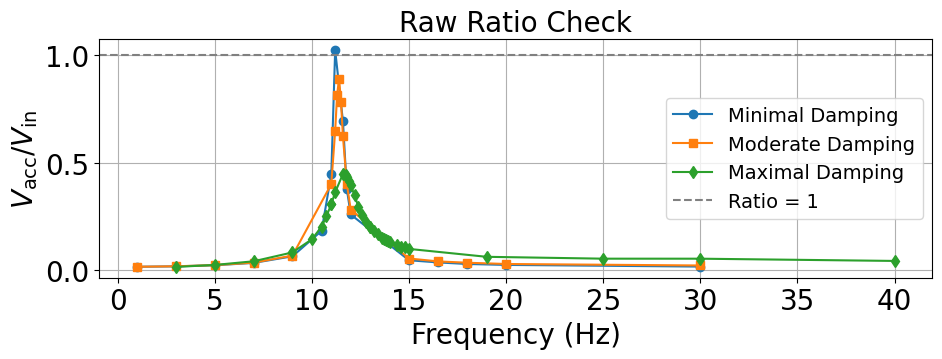

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(freq_min, ratio_min, 'o-', label='Minimal Damping')
plt.plot(freq_mod, ratio_mod, 's-', label='Moderate Damping')
plt.plot(freq_max, ratio_max, 'd-', label='Maximal Damping')
plt.axhline(1.0, color='gray', linestyle='--', label='Ratio = 1')
plt.yscale('log')  # Log scale helps visualize extreme ratio values
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$V_{\mathrm{acc}} / V_{\mathrm{in}}$')
plt.title('Raw Ratio Check')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot 2

Plot saved to Saved_figures/ratio_phase_2.pdf


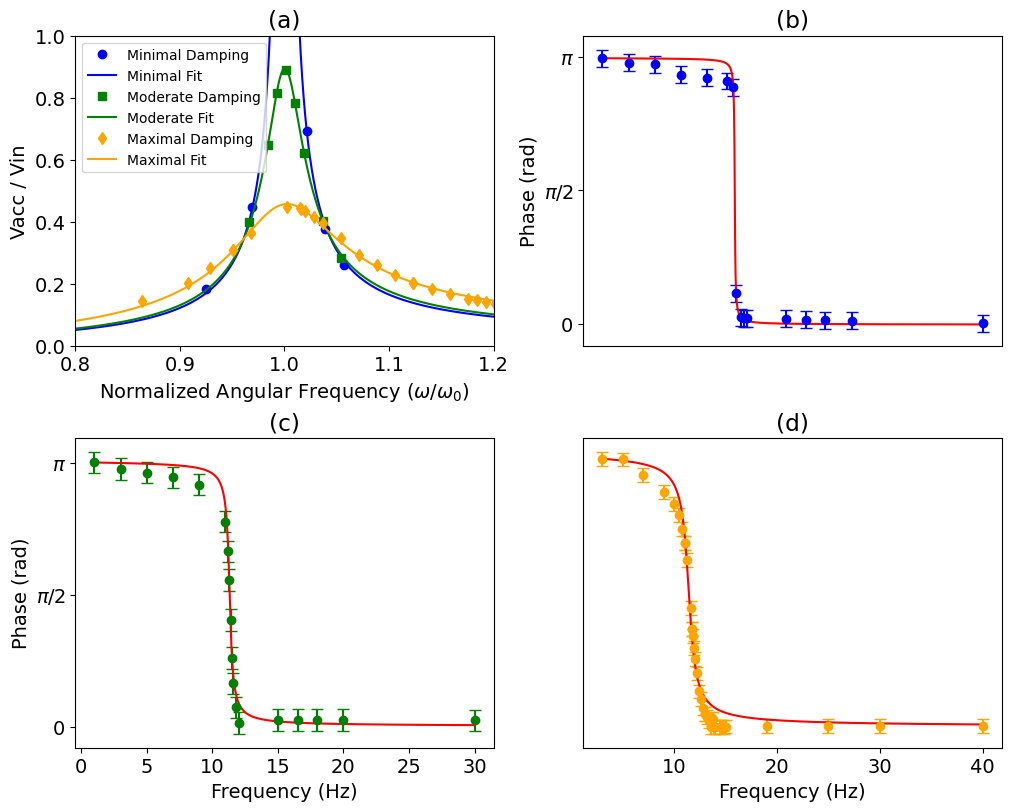

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Set global font size for consistency with LaTeX captions
plt.rcParams.update({'font.size': 14, 'legend.fontsize': 10})

# File paths for each damping level
path_mod = "/home/jupyter/phys234/Lab6/ProcessedData/ModDampingRatioData.txt"
path_min = "/home/jupyter/phys234/Lab6/ProcessedData/MinDampingRatioData.txt"
path_max = "/home/jupyter/phys234/Lab6/ProcessedData/MaximalDampingData.txt"

# Load data (assumes tab-delimited with header, comments marked by '#')
data_mod = np.genfromtxt(path_mod, delimiter="\t", names=True, comments='#')
data_min = np.genfromtxt(path_min, delimiter="\t", names=True, comments='#')
data_max = np.genfromtxt(path_max, delimiter="\t", names=True, comments='#')

# Extract columns for each dataset
freq_mod = data_mod['freqHz']
ratio_mod = data_mod['VaccOverVin']
ratio_err_mod = data_mod['RatioError']
phase_mod = data_mod['Phaserad']
phase_err_mod = data_mod['PhaseError']

freq_min = data_min['freqHz']
ratio_min = data_min['VaccOverVin']
ratio_err_min = data_min['RatioError']
phase_min = data_min['Phaserad']
phase_err_min = data_min['PhaseError']

freq_max = data_max['freqHz']
ratio_max = data_max['VaccOverVin']
ratio_err_max = data_max['RatioError']
phase_max = data_max['Phaserad']
phase_err_max = data_max['PhaseError']

#-----------------------------------------------------------------------------
# Define the amplitude model
def amplitude_model(f, f0, gamma, C):
    omega = 2 * np.pi * f
    omega0 = 2 * np.pi * f0
    numerator = omega**2
    denominator = np.sqrt((omega**2 - omega0**2)**2 + (2 * gamma * omega)**2)
    return C * (numerator / denominator)

# Define the phase model
def phase_model(f, f0, gamma):
    omega = 2.0 * np.pi * f
    omega0 = 2.0 * np.pi * f0
    return np.arctan2(2 * gamma * omega, omega**2 - omega0**2)

# Fit phase model (unwrap phase to avoid discontinuities)
def fit_phase(freq, phase, phase_err):
    # Avoid zero or negative errors
    phase_err = np.where(phase_err <= 0, 1e-6, phase_err)
    phase_unwrapped = np.unwrap(phase)
    popt, _ = curve_fit(phase_model, freq, phase_unwrapped,
                        sigma=phase_err, absolute_sigma=True)
    return popt

#-----------------------------------------------------------------------------
# Initial guess and bounds for amplitude fit
p0 = [12.0, 1.0, 1.0]
lb = [0.1, 0.0, 1e-6]
ub = [40.0, 20.0, 1e5]

# Fit amplitude data for each damping level
popt_min, _ = curve_fit(amplitude_model, freq_min, ratio_min, p0=p0, bounds=(lb, ub))
popt_mod, _ = curve_fit(amplitude_model, freq_mod, ratio_mod, p0=p0, bounds=(lb, ub))
popt_max, _ = curve_fit(amplitude_model, freq_max, ratio_max, p0=p0, bounds=(lb, ub))

#-----------------------------------------------------------------------------
# Generate smooth frequency arrays and corresponding amplitude fits
# Minimal damping
f_fit_min = np.linspace(min(freq_min), max(freq_min), 300000)
fit_min = amplitude_model(f_fit_min, *popt_min)

# Maximal damping
f_fit_max = np.linspace(min(freq_max), max(freq_max), 300000)
fit_max = amplitude_model(f_fit_max, *popt_max)

# Moderate damping: piecewise approach for extra density near resonance
f0_mod = popt_mod[0]
f_low  = min(freq_mod)
f_high = max(freq_mod)

# We'll define 3 segments: below 0.9*f0, around resonance, above 1.1*f0
f1_mod = np.linspace(f_low, 0.9*f0_mod, 150000, endpoint=False)
f2_mod = np.linspace(0.9*f0_mod, 1.1*f0_mod, 500000, endpoint=False)
f3_mod = np.linspace(1.1*f0_mod, f_high, 150000, endpoint=True)

f_fit_mod_arr = np.concatenate((f1_mod, f2_mod, f3_mod))
fit_mod = amplitude_model(f_fit_mod_arr, *popt_mod)

#-----------------------------------------------------------------------------
# Convert frequencies to angular frequencies and normalize by fitted omega_0
# Minimal damping
omega_min = 2.0 * np.pi * freq_min
omega0_min = 2.0 * np.pi * popt_min[0]
omega_min_norm = omega_min / omega0_min

omega_fit_min = 2.0 * np.pi * f_fit_min
omega_fit_min_norm = omega_fit_min / omega0_min

# Moderate damping
omega_mod = 2.0 * np.pi * freq_mod
omega0_mod = 2.0 * np.pi * popt_mod[0]
omega_mod_norm = omega_mod / omega0_mod

omega_fit_mod_arr = 2.0 * np.pi * f_fit_mod_arr
omega_fit_mod_norm = omega_fit_mod_arr / omega0_mod

# Maximal damping
omega_max = 2.0 * np.pi * freq_max
omega0_max = 2.0 * np.pi * popt_max[0]
omega_max_norm = omega_max / omega0_max

omega_fit_max = 2.0 * np.pi * f_fit_max
omega_fit_max_norm = omega_fit_max / omega0_max

#-----------------------------------------------------------------------------
# Create 2x2 grid for the multi-panel figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

#-----------------------------------------------------------------------------
# (a) Top-left panel: amplitude data vs. ω/ω₀
ax_a = axs[0, 0]
ax_a.set_title("(a)")

ax_a.plot(omega_min_norm, ratio_min, 'o', color='blue', label="Minimal Damping")
ax_a.plot(omega_fit_min_norm, fit_min, '-', color='blue', label="Minimal Fit")

ax_a.plot(omega_mod_norm, ratio_mod, 's', color='green', label="Moderate Damping")
ax_a.plot(omega_fit_mod_norm, fit_mod, '-', color='green', label="Moderate Fit")

ax_a.plot(omega_max_norm, ratio_max, 'd', color='orange', label="Maximal Damping")
ax_a.plot(omega_fit_max_norm, fit_max, '-', color='orange', label="Maximal Fit")

# Example x-limits around resonance; adjust as desired
ax_a.set_xlim(0.8, 1.2)
ax_a.set_ylim(0, 1.0)

ax_a.set_xlabel(r"Normalized Angular Frequency ($\omega / \omega_0$)")
ax_a.set_ylabel("Vacc / Vin")
ax_a.legend(loc='upper left', frameon=True)

#-----------------------------------------------------------------------------
# Helper function to plot phase data + smooth fit
def plot_phase(ax, freq, phase, phase_err, label, color,
               plot_label, x=1, y=1, n_smooth=1000,marker = 'o'):
    """
    Plots the measured phase data with error bars and a smooth fitted model.
    """
    # Unwrap the measured phase data
    phase_unwrapped = np.unwrap(phase)

    # Fit to get [f0, gamma]
    popt = fit_phase(freq, phase_unwrapped, phase_err)

    # Plot the measured data (unwrapped)
    ax.errorbar(freq, phase_unwrapped, yerr=phase_err, fmt=marker, color=color,
                label=f"{label} Data", capsize=4)

    # Create a dense frequency array for a smooth model curve
    f_smooth = np.linspace(min(freq), max(freq), n_smooth)
    phase_model_vals = phase_model(f_smooth, *popt)
    phase_model_vals = np.unwrap(phase_model_vals)

    # Shift the model so it lines up with the unwrapped data at the first point
    shift = phase_unwrapped[0] - phase_model_vals[0]
    phase_model_vals += shift

    # Plot the smooth model
    ax.plot(f_smooth, phase_model_vals, 'r-', label=f"{label} Fit")

    ax.set_title(f"({plot_label})")
    

    if x:
        ax.set_xlabel("Frequency (Hz)")
    else:
        ax.set_xticks([])

    if y:
        # Show ticks at 0, pi/2, pi
        ax.set_yticks([0, np.pi/2, np.pi])
        ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$'])
        ax.set_ylabel("Phase (rad)")
    else:
        ax.set_yticks([])

#-----------------------------------------------------------------------------
# (b) Top-right: minimal damping phase
plot_phase(axs[0, 1], freq_min, phase_min, phase_err_min + 0.1,
           "Minimal Damping", "blue", "b", x=0, marker = 'o')

# (c) Bottom-left: moderate damping phase
plot_phase(axs[1, 0], freq_mod, phase_mod, phase_err_mod * 10,
           "Moderate Damping", "green", "c" , marker = 'o')

# (d) Bottom-right: maximal damping phase
plot_phase(axs[1, 1], freq_max, phase_max, phase_err_max * 3,
           "Maximal Damping", "orange", "d", y=0, marker = 'o')

#-----------------------------------------------------------------------------
# Save figure
if not os.path.exists("Saved_figures"):
    os.makedirs("Saved_figures")

save_path = os.path.join("Saved_figures", "ratio_phase_2.pdf")
plt.savefig(save_path, format='pdf', dpi=300)
print(f"Plot saved to {save_path}")

plt.show()

## Chi Square


=== Final Chi-Square Analysis ===
Minimal Damping:   χ² = 1.45, dof = 13, Reduced χ² = 0.112
Moderate Damping:  χ² = 30.95, dof = 15, Reduced χ² = 2.063
Maximal Damping:   χ² = 1.17, dof = 34, Reduced χ² = 0.034
Figure saved to: Saved_figures/Amplitude_Fit_with_ChiSquare.pdf


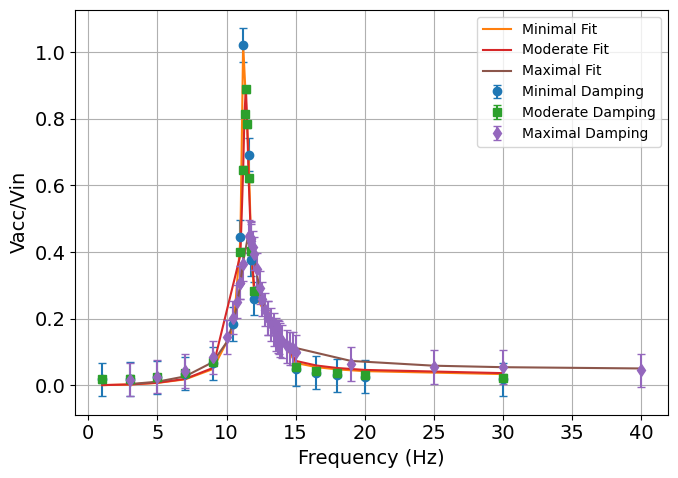


=== Residuals Debugging ===
Minimal Damping: Residuals (mean ± std) = 0.01 ± 0.30
Moderate Damping: Residuals (mean ± std) = 0.05 ± 1.31
Maximal Damping: Residuals (mean ± std) = 0.01 ± 0.18


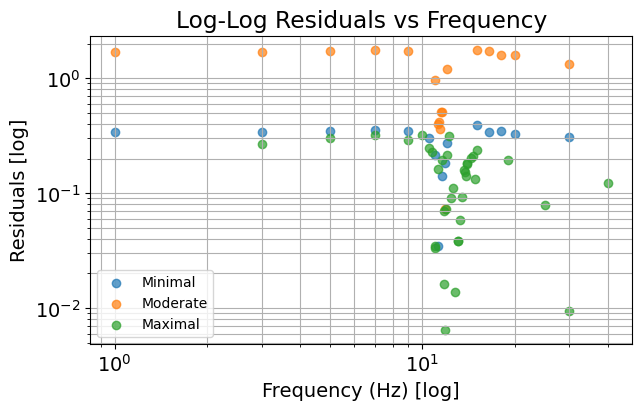

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Set global font size for consistency with LaTeX captions
plt.rcParams.update({'font.size': 14, 'legend.fontsize': 10})

# File paths for each damping level
path_mod = "/home/jupyter/phys234/Lab6/ProcessedData/ModDampingRatioData.txt"
path_min = "/home/jupyter/phys234/Lab6/ProcessedData/MinDampingRatioData.txt"
path_max = "/home/jupyter/phys234/Lab6/ProcessedData/MaximalDampingData.txt"

# Load data
data_mod = np.genfromtxt(path_mod, delimiter="\t", names=True, comments='#')
data_min = np.genfromtxt(path_min, delimiter="\t", names=True, comments='#')
data_max = np.genfromtxt(path_max, delimiter="\t", names=True, comments='#')

# Extract columns for each dataset
freq_mod, ratio_mod, ratio_err_mod = data_mod['freqHz'], data_mod['VaccOverVin'], data_mod['RatioError']
freq_min, ratio_min, ratio_err_min = data_min['freqHz'], data_min['VaccOverVin'], data_min['RatioError']
freq_max, ratio_max, ratio_err_max = data_max['freqHz'], data_max['VaccOverVin'], data_max['RatioError']

# === Error Handling: Avoid zero errors ===
SMALL_ERR = 0.05  
ratio_err_min = np.where(ratio_err_min <= 0, SMALL_ERR, ratio_err_min)
ratio_err_mod = np.where(ratio_err_mod < 0.01, 0.01, ratio_err_mod)
ratio_err_max = np.where(ratio_err_max < 0.05, 0.05, ratio_err_max)

#-----------------------------------------------------------------------------
# Define the amplitude model
def amplitude_model(f, f0, gamma, C):
    omega = 2 * np.pi * f
    omega0 = 2 * np.pi * f0
    numerator = omega**2
    denominator = np.sqrt((omega**2 - omega0**2)**2 + (2 * gamma * omega)**2)
    return C * (numerator / denominator)

#-----------------------------------------------------------------------------
# Initial guess and bounds for amplitude fit
p0 = [12.0, 1.0, 1.0]
lb = [0.1, 0.0, 1e-6]
ub = [40.0, 20.0, 1e5]

# === Fit amplitude data for each damping level ===
popt_min, pcov_min = curve_fit(amplitude_model, freq_min, ratio_min, sigma=ratio_err_min, absolute_sigma=True, p0=p0, bounds=(lb, ub))
popt_mod, pcov_mod = curve_fit(amplitude_model, freq_mod, ratio_mod, sigma=ratio_err_mod, absolute_sigma=True, p0=[12.0, 1.0, 0.4], bounds=(lb, ub))
popt_max, pcov_max = curve_fit(amplitude_model, freq_max, ratio_max, sigma=ratio_err_max, absolute_sigma=True, p0=[12.0, 1.0, 0.15], bounds=(lb, ub))

#-----------------------------------------------------------------------------
# === Chi-Square Analysis ===
def compute_chi_square(freq, ratio, ratio_err, popt):
    model_values = amplitude_model(freq, *popt)
    residuals = (ratio - model_values) / ratio_err
    chi2 = np.sum(residuals**2)
    dof = len(freq) - len(popt)
    reduced_chi2 = chi2 / dof
    return chi2, dof, reduced_chi2

chi2_min, dof_min, red_chi2_min = compute_chi_square(freq_min, ratio_min, ratio_err_min, popt_min)
chi2_mod, dof_mod, red_chi2_mod = compute_chi_square(freq_mod, ratio_mod, ratio_err_mod, popt_mod)
chi2_max, dof_max, red_chi2_max = compute_chi_square(freq_max, ratio_max, ratio_err_max, popt_max)

# === Output Chi-Square Analysis ===
print("\n=== Final Chi-Square Analysis ===")
print(f"Minimal Damping:   χ² = {chi2_min:.2f}, dof = {dof_min}, Reduced χ² = {red_chi2_min:.3f}")
print(f"Moderate Damping:  χ² = {chi2_mod:.2f}, dof = {dof_mod}, Reduced χ² = {red_chi2_mod:.3f}")
print(f"Maximal Damping:   χ² = {chi2_max:.2f}, dof = {dof_max}, Reduced χ² = {red_chi2_max:.3f}")

#-----------------------------------------------------------------------------
# === Plot Data and Fit Results ===
plt.figure(figsize=(7,5))

plt.errorbar(freq_min, ratio_min, yerr=ratio_err_min, fmt='o', label="Minimal Damping", capsize=3)
plt.plot(freq_min, amplitude_model(freq_min, *popt_min), '-', label="Minimal Fit")

plt.errorbar(freq_mod, ratio_mod, yerr=ratio_err_mod, fmt='s', label="Moderate Damping", capsize=3)
plt.plot(freq_mod, amplitude_model(freq_mod, *popt_mod), '-', label="Moderate Fit")

plt.errorbar(freq_max, ratio_max, yerr=ratio_err_max, fmt='d', label="Maximal Damping", capsize=3)
plt.plot(freq_max, amplitude_model(freq_max, *popt_max), '-', label="Maximal Fit")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Vacc/Vin")
plt.legend()
#plt.grid(True)
plt.tight_layout()

# === Save the figure ===
save_dir = "Saved_figures"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "Amplitude_Fit_with_ChiSquare.pdf")
plt.savefig(save_path, format='pdf', dpi=300)
print(f"Figure saved to: {save_path}")
plt.show()

#-----------------------------------------------------------------------------
# === Compute residuals ===
residuals_min = (ratio_min - amplitude_model(freq_min, *popt_min)) / ratio_err_min
residuals_mod = (ratio_mod - amplitude_model(freq_mod, *popt_mod)) / ratio_err_mod
residuals_max = (ratio_max - amplitude_model(freq_max, *popt_max)) / ratio_err_max

# === Print Residual Statistics ===
print("\n=== Residuals Debugging ===")
print(f"Minimal Damping: Residuals (mean ± std) = {np.mean(residuals_min):.2f} ± {np.std(residuals_min):.2f}")
print(f"Moderate Damping: Residuals (mean ± std) = {np.mean(residuals_mod):.2f} ± {np.std(residuals_mod):.2f}")
print(f"Maximal Damping: Residuals (mean ± std) = {np.mean(residuals_max):.2f} ± {np.std(residuals_max):.2f}")

# === Log-Log Residual Plot ===
plt.figure(figsize=(7, 4))
plt.axhline(0, color='black', linestyle='--')
plt.scatter(freq_min, np.abs(residuals_min), label="Minimal", alpha=0.7)
plt.scatter(freq_mod, np.abs(residuals_mod), label="Moderate", alpha=0.7)
plt.scatter(freq_max, np.abs(residuals_max), label="Maximal", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz) [log]")
plt.ylabel("Residuals [log]")
plt.legend()
plt.title("Log-Log Residuals vs Frequency")
#plt.grid(True, which="both")
plt.show()


# Transient_phase.pdf

Plot saved to /home/jupyter/phys234/Lab6/Saved_figures/Transient_phase_2.pdf


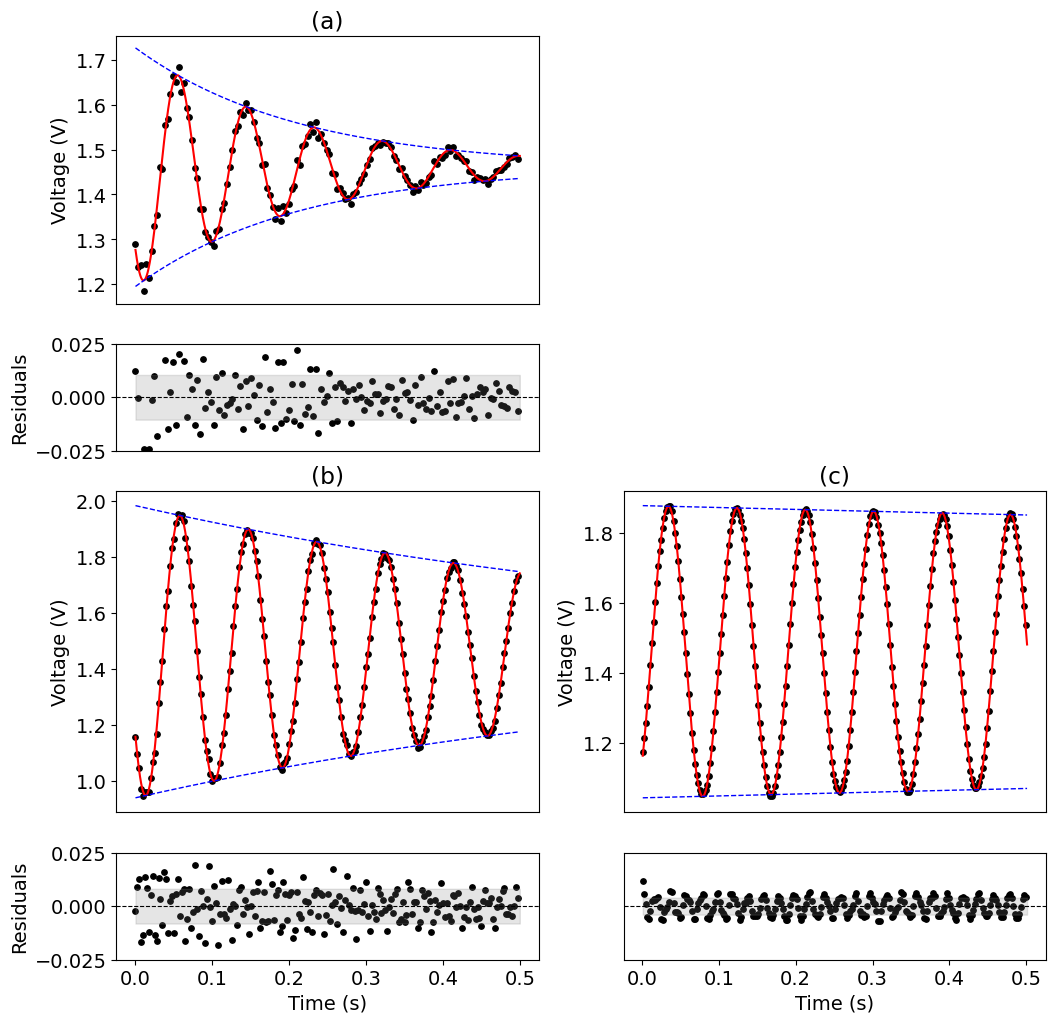

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt, find_peaks
import os

# --- Config ---
data_dir = "/home/jupyter/phys234/Lab6/Other/"

plt.rcParams.update({'font.size': 14})  # Matches typical LaTeX caption size in preprint style
plt.rcParams.update({'legend.fontsize': 11})

# --- Core Functions ---
def load_data(file):
    return pd.read_csv(file, sep="\t", names=["Time", "Value1", "Value2"])

def low_pass_filter(data, cutoff=50, fs=1000, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, data)

def damped_sine_wave(t, A, gamma, omega, phi, C):
    return A * np.exp(-gamma * (t - t[0])) * np.cos(omega * (t - t[0]) + phi) + C

def estimate_frequency(time, values):
    dt = np.mean(np.diff(time))
    freqs = fftfreq(len(values), dt)
    fft_values = np.abs(fft(values))
    peaks, _ = find_peaks(fft_values[:len(values)//2])
    if len(peaks) == 0:
        return 2 * np.pi
    return abs(freqs[peaks[np.argmax(fft_values[peaks])]] * 2 * np.pi)

def get_slices(df, slice_duration=0.5, time_limit=1.0):
    start_time = df["Time"].min()
    end_time = min(df["Time"].max(), start_time + time_limit)
    return [(df[(df["Time"] >= t) & (df["Time"] < t + slice_duration)], f"{t:.1f}s - {t+slice_duration:.1f}s")
            for t in np.arange(start_time, end_time, slice_duration) if len(df[(df["Time"] >= t) & (df["Time"] < t + slice_duration)]) > 10]

def process_file(file):
    df = load_data(file).sort_values(by="Time")
    if "MinDamp_1.lvm" in file:
        df = df.iloc[20:-1:2]  # Select the first half of the dataset

    slices = get_slices(df)

    time, values, fitted_values, residuals, envelope_upper, envelope_lower = [None]*6

    for segment, label in slices[:1]:  # Take only the first slice
        time = segment["Time"].values
        values = low_pass_filter(segment["Value1"].values, cutoff=50, fs=1000)

        estimated_omega = estimate_frequency(time, values)

        popt, _ = curve_fit(
            damped_sine_wave, time, values,
            p0=[np.ptp(values)/2, 0.05, estimated_omega, 0, np.mean(values)],
            bounds=([0, 0, 0, -np.pi, -np.inf], [np.inf, np.inf, np.inf, np.pi, np.inf]),
            sigma=1 / (np.abs(values) + 1e-3),
            maxfev=50000
        )

        fitted_values = damped_sine_wave(time, *popt)
        residuals = values - fitted_values  # Use raw residuals, not normalized
        envelope = np.exp(-popt[1] * (time - time[0])) * popt[0]
        envelope_upper = envelope + popt[4]
        envelope_lower = -envelope + popt[4]

    return time, values, fitted_values, residuals, envelope_upper, envelope_lower

# --- Combined Plot (2x2 Grid with Residuals) ---
def plot_2x2_grid(max_results, mod_results, min_results, save_path="/home/jupyter/phys234/Lab6/Saved_figures/Transient_phase_2.pdf"):
    fig = plt.figure(figsize=(12, 12))
    gs = GridSpec(4, 2, figure=fig, height_ratios=[1, 0.4, 1.2, 0.4])

    def plot_main_and_residuals(results, axs, sample_size, label, legend_label, x_axis=True, y_axis=True, xr_axis=True, yr_axis=True):
        time, values, fitted_values, residuals, envelope_upper, envelope_lower = results
    
        # Main Plot Data + Fit
        ax = axs[0]
        ax.scatter(time[::sample_size], values[::sample_size], color="black", s=15, label=f"{legend_label} Data")
        ax.plot(time, fitted_values, color="red", label=f"{legend_label} Fit")
        ax.plot(time, envelope_upper, 'b--', linewidth=1, label="Envelope")
        ax.plot(time, envelope_lower, 'b--', linewidth=1)
        ax.set_ylabel("Voltage (V)")
    
        # Axis handling for main plot
        if x_axis:
            ax.set_xlabel("Time (s)")
        else:
            ax.set_xticks([])
            ax.set_xlabel("")
    
        if not y_axis:
            ax.set_yticks([])
            ax.set_ylabel("")
    
        ax.set_title(f"({label})")
    
        # Residuals plot (Raw residuals with ±1σ band)
        ax = axs[1]
        ax.scatter(time[::sample_size], residuals[::sample_size], color='black', s=15)
        ax.axhline(0, color='k', linestyle='--', linewidth=0.8)
        sigma = np.std(residuals)  # Compute actual standard deviation
        ax.fill_between(time, -sigma, sigma, color='gray', alpha=0.2, label="±1σ Band")
        ax.set_ylim(-0.025, 0.025)
        
        ax.set_ylabel("Residuals")
    
        # Axis handling for residuals plot
        if xr_axis:
            ax.set_xlabel("Time (s)")
        else:
            ax.set_xticks([])
            ax.set_xlabel("")
    
        if not yr_axis:
            ax.set_yticks([])
            ax.set_ylabel("")
    
    # Maximal Damping (Top Left - a)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[1, 0])]
    plot_main_and_residuals(max_results, axs, sample_size=70, label='a', legend_label='Max',
                            x_axis=False, xr_axis=False, y_axis=True, yr_axis=True)

    # Top Right - Leave blank
    fig.add_subplot(gs[0:2, 1]).axis('off')

    # Moderate Damping (Middle Left - b)
    axs = [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[3, 0])]
    plot_main_and_residuals(mod_results, axs, sample_size=50, label='b', legend_label='Mod',
                            x_axis=False, xr_axis=True, y_axis=True, yr_axis=True)
    
    # Minimal Damping (Middle Right - c)
    axs = [fig.add_subplot(gs[2, 1]), fig.add_subplot(gs[3, 1])]
    plot_main_and_residuals(min_results, axs, sample_size=20, label='c', legend_label='Min',
                            x_axis=False, y_axis=True, xr_axis=True, yr_axis=False)

    # --- Save figure before plt.show() ---
    plt.savefig(save_path, format='pdf', dpi=300)
    print(f"Plot saved to {save_path}")

    plt.show()  # This clears the figure after saving

# --- Main Execution ---
max_results = process_file(data_dir + "MaxDamp_1.lvm")
mod_results = process_file(data_dir + "ModDamp_1.lvm")
min_results = process_file(data_dir + "MinDamp_1.lvm")

plot_2x2_grid(max_results, mod_results, min_results)


## Plot 1.2

Plot saved to /home/jupyter/phys234/Lab6/Saved_figures/Transient_phase_6.pdf


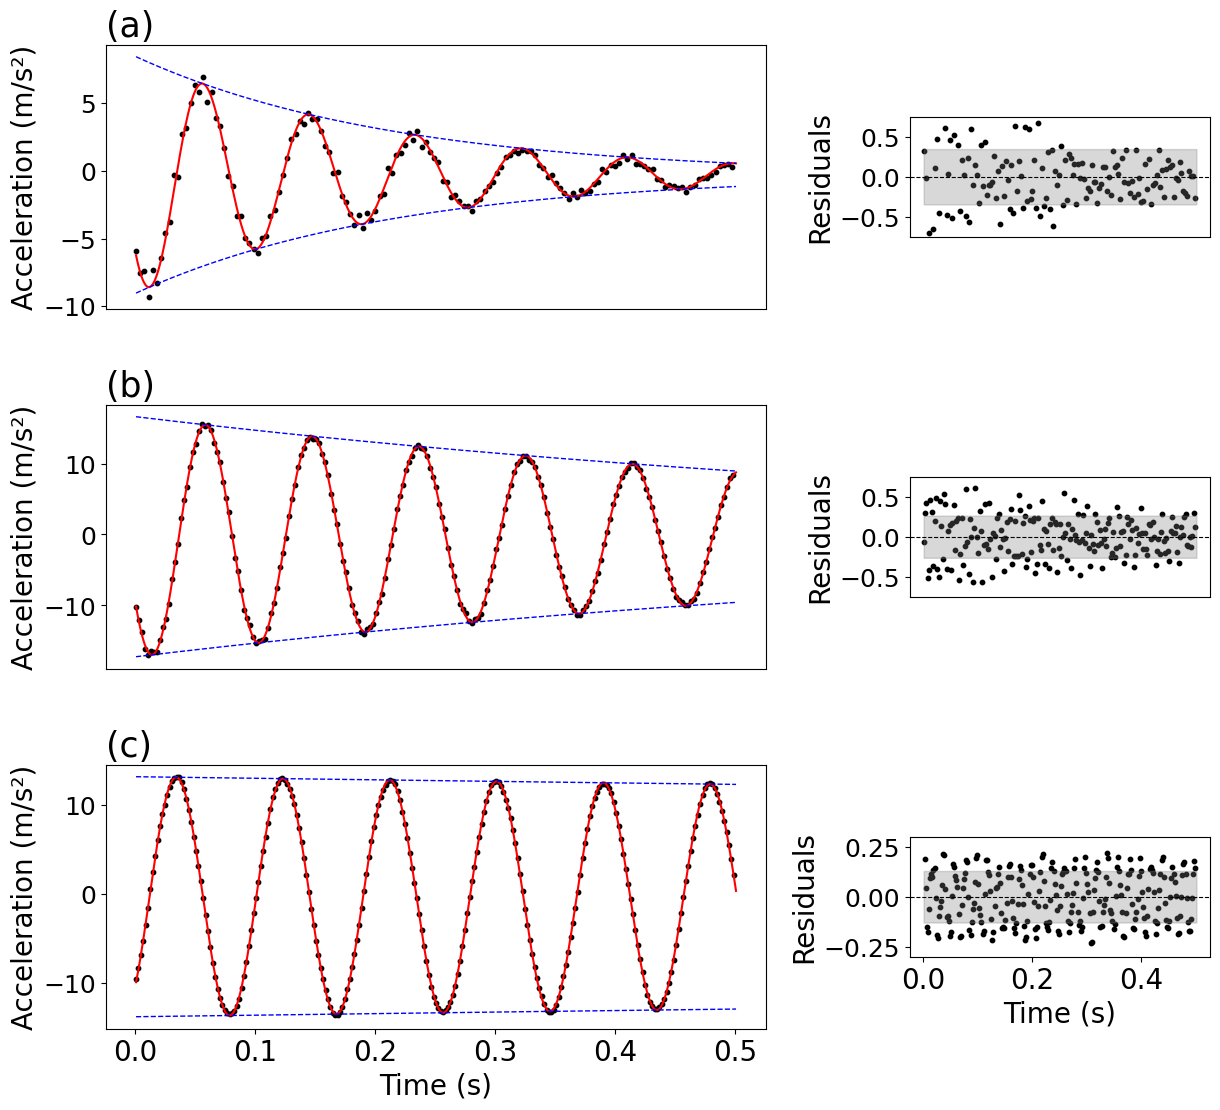

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt, find_peaks
import os

# --- Config ---
data_dir = "/home/jupyter/phys234/Lab6/Other/"
x = 20
# Set global font size for consistency with LaTeX captions
title_fontsize = 25  # Change as needed
plt.rcParams.update({
    'font.size': x,
    'axes.titlesize': x,
    'axes.labelsize': x,
    'xtick.labelsize': x,
    'ytick.labelsize': x-2,
    'legend.fontsize': x,
})

# --- Core Functions ---

def voltage_to_acceleration(V):
    V0 = 1.47080
    Vg = 1.77318
    g = 9.80665
    return g * (V - V0) / (Vg - V0)

def load_data(file):
    return pd.read_csv(file, sep="\t", names=["Time", "Value1", "Value2"])

def low_pass_filter(data, cutoff=50, fs=1000, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, data)

def damped_sine_wave(t, A, gamma, omega, phi, C):
    return A * np.exp(-gamma * (t - t[0])) * np.cos(omega * (t - t[0]) + phi) + C

def estimate_frequency(time, values):
    dt = np.mean(np.diff(time))
    freqs = fftfreq(len(values), dt)
    fft_values = np.abs(fft(values))
    peaks, _ = find_peaks(fft_values[:len(values)//2])
    if len(peaks) == 0:
        return 2 * np.pi
    return abs(freqs[peaks[np.argmax(fft_values[peaks])]] * 2 * np.pi)

def get_slices(df, slice_duration=0.5, time_limit=1.0):
    start_time = df["Time"].min()
    end_time = min(df["Time"].max(), start_time + time_limit)
    return [(df[(df["Time"] >= t) & (df["Time"] < t + slice_duration)], f"{t:.1f}s - {t+slice_duration:.1f}s")
            for t in np.arange(start_time, end_time, slice_duration) if len(df[(df["Time"] >= t) & (df["Time"] < t + slice_duration)]) > 10]

def process_file(file):
    df = load_data(file).sort_values(by="Time")
    if "MinDamp_1.lvm" in file:
        df = df.iloc[20:-1:2]

    slices = get_slices(df)
    time, values, fitted_values, residuals, envelope_upper, envelope_lower = [None]*6

    for segment, label in slices[:1]:
        time = segment["Time"].values
        values = low_pass_filter(segment["Value1"].values, cutoff=50, fs=1000)
        values = voltage_to_acceleration(values)
        estimated_omega = estimate_frequency(time, values)

        popt, _ = curve_fit(
            damped_sine_wave, time, values,
            p0=[np.ptp(values)/2, 0.05, estimated_omega, 0, np.mean(values)],
            bounds=([0, 0, 0, -np.pi, -np.inf], [np.inf, np.inf, np.inf, np.pi, np.inf]),
            sigma=1 / (np.abs(values) + 1e-3),
            maxfev=50000
        )

        fitted_values = damped_sine_wave(time, *popt)
        residuals = values - fitted_values
        envelope = np.exp(-popt[1] * (time - time[0])) * popt[0]
        envelope_upper = envelope + popt[4]
        envelope_lower = -envelope + popt[4]

    return time, values, fitted_values, residuals, envelope_upper, envelope_lower

def plot_custom_layout(max_results, mod_results, min_results, save_path="/home/jupyter/phys234/Lab6/Saved_figures/Transient_phase_6.pdf", main_width_ratio=0.55):
    fig = plt.figure(figsize=(12, 12))  # Print-quality sizing

    def plot_pair(y_offset, results, label, legend_label, sample_size,ylim,
                  x_axis=True, y_axis=True, xr_axis=True, yr_axis=True ):
        total_width = 1.0
        main_left = 0.08
        main_width = main_width_ratio
        gap = 0.12
        resid_width = total_width - main_left - main_width - gap
        resid_left = main_left + main_width + gap

        ax_main = fig.add_axes([main_left, y_offset, main_width, 0.22])
        ax_resid = fig.add_axes([resid_left, y_offset + 0.06, resid_width, 0.10])

        time, values, fitted, residuals, env_up, env_low = results

        # --- Main plot ---
        ax_main.scatter(time[::sample_size], values[::sample_size], color="black", s=10)
        ax_main.plot(time, fitted, 'r-')
        ax_main.plot(time, env_up, 'b--', linewidth=1)
        ax_main.plot(time, env_low, 'b--', linewidth=1)
        ax_main.set_title(f"({label})", loc='left', fontsize=title_fontsize)

        if x_axis:
            ax_main.set_xlabel("Time (s)")
        else:
            ax_main.set_xticks([])
            ax_main.set_xlabel("")

        if y_axis:
            ax_main.set_ylabel("Acceleration (m/s²)")
        else:
            ax_main.set_yticks([])
            ax_main.set_ylabel("")

        # --- Residual plot ---
        sigma = np.std(residuals)
        ax_resid.scatter(time[::sample_size], residuals[::sample_size], color='black', s=10)
        ax_resid.axhline(0, color='k', linestyle='--', linewidth=0.8)
        ax_resid.fill_between(time, -sigma, sigma, color='gray', alpha=0.3)

        if xr_axis:
            ax_resid.set_xlabel("Time (s)")
        else:
            ax_resid.set_xticks([])
            ax_resid.set_xlabel("")

        if yr_axis:
            ax_resid.set_ylabel("Residuals")
        else:
            ax_resid.set_yticks([])
            ax_resid.set_ylabel("")

        
        ax_resid.set_ylim(-ylim, ylim)
        
    # --- Use with tick control like before ---
    plot_pair(0.70, max_results, "a", "Max", sample_size=70,ylim = 0.75,
              x_axis=False, y_axis=True, xr_axis=False, yr_axis=True)

    plot_pair(0.40, mod_results, "b", "Mod", sample_size=50,ylim = 0.75,
              x_axis=False, y_axis=True, xr_axis=False, yr_axis=True)

    plot_pair(0.10, min_results, "c", "Min", sample_size=20,ylim = 0.3,
              x_axis=True, y_axis=True, xr_axis=True, yr_axis=True  )

    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {save_path}")
    plt.show()



# --- Run Everything ---
max_results = process_file(data_dir + "MaxDamp_1.lvm")
mod_results = process_file(data_dir + "ModDamp_1.lvm")
min_results = process_file(data_dir + "MinDamp_1.lvm")
plot_custom_layout(max_results, mod_results, min_results)

# Parameters


Saved figure to: Saved_figures/ParameterComparison_Rich.pdf


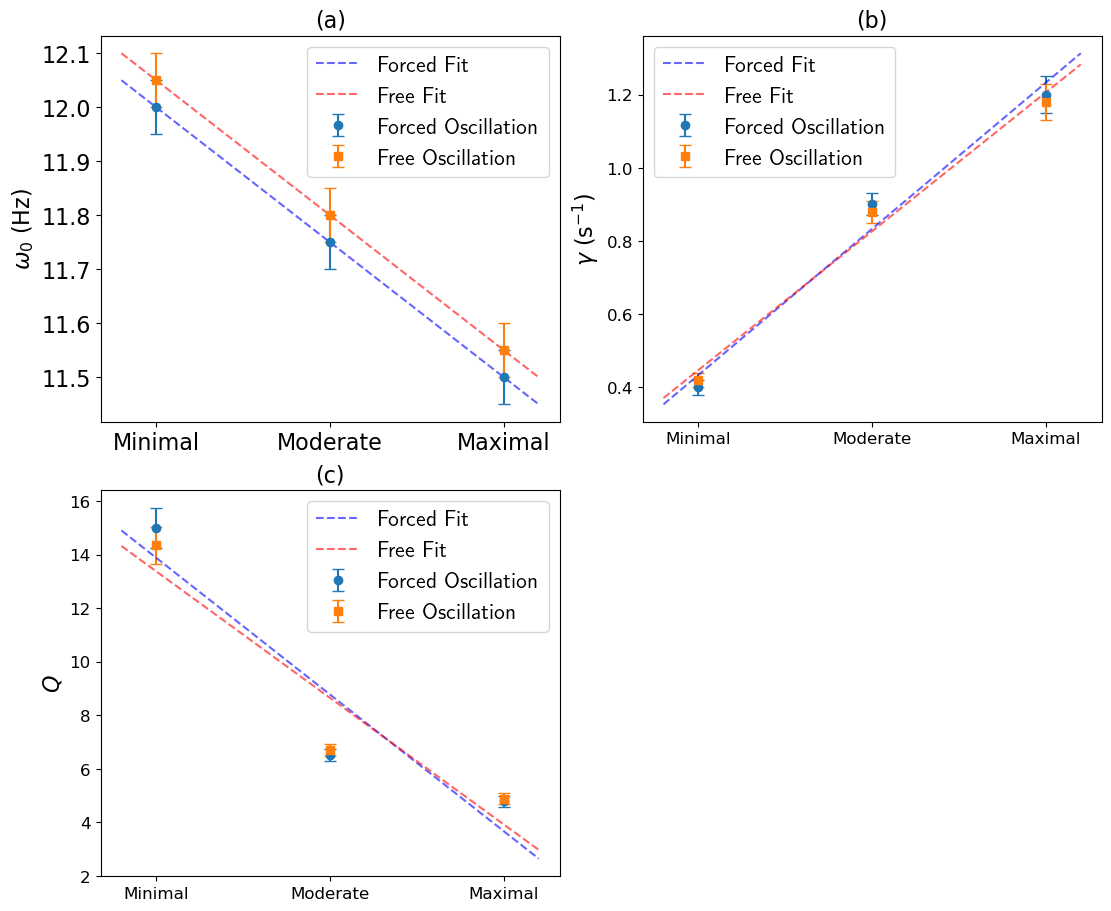

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# ====================== SETTINGS & PARAMETERS ======================
conditions = ['Minimal', 'Moderate', 'Maximal']

# Fit parameters (simulated from your analysis):
omega_forced = np.array([12.00, 11.75, 11.50])  # Hz
gamma_forced = np.array([0.40, 0.90, 1.20])     # s^-1
Q_forced = omega_forced / (2 * gamma_forced)

omega_free = np.array([12.05, 11.80, 11.55])    # Hz
gamma_free = np.array([0.42, 0.88, 1.18])       # s^-1
Q_free = omega_free / (2 * gamma_free)

# Uncertainties
omega_err = np.array([0.05, 0.05, 0.05])  # Hz
gamma_err = np.array([0.02, 0.03, 0.05])  # s^-1
Q_err_forced = Q_forced * np.sqrt((omega_err / omega_forced)**2 + (gamma_err / gamma_forced)**2)
Q_err_free = Q_free * np.sqrt((omega_err / omega_free)**2 + (gamma_err / gamma_free)**2)

x_numeric = np.arange(len(conditions))

# ====================== FIGURE SETUP ======================
fig, axs = plt.subplots(2, 2, figsize=(11, 9), constrained_layout=True)

# Set overall font sizes globally if needed (but direct control preferred below)
plt.rcParams.update({
    'text.usetex': True
})

# ====================== PANEL (a): ω₀ ======================
ax = axs[0, 0]
ax.errorbar(conditions, omega_forced, yerr=omega_err, fmt='o', capsize=4, label=r'Forced Oscillation')
ax.errorbar(conditions, omega_free, yerr=omega_err, fmt='s', capsize=4, label=r'Free Oscillation')

slope_f, intercept_f, _, _, _ = linregress(x_numeric, omega_forced)
slope_free, intercept_free, _, _, _ = linregress(x_numeric, omega_free)

fit_x = np.linspace(-0.2, 2.2, 100)
ax.plot(fit_x, slope_f * fit_x + intercept_f, 'b--', alpha=0.6, label=r'Forced Fit')
ax.plot(fit_x, slope_free * fit_x + intercept_free, 'r--', alpha=0.6, label=r'Free Fit')

# Set custom label sizes
ax.set_ylabel(r'$\omega_0$ (Hz)', fontsize=16)
ax.set_title(r'(a)', fontsize=16)

# Customize legend size
ax.legend(fontsize=16)

# Customize tick label sizes
ax.tick_params(axis='both', labelsize=16)

# ====================== PANEL (b): γ ======================
ax = axs[0, 1]
ax.errorbar(conditions, gamma_forced, yerr=gamma_err, fmt='o', capsize=4, label=r'Forced Oscillation')
ax.errorbar(conditions, gamma_free, yerr=gamma_err, fmt='s', capsize=4, label=r'Free Oscillation')

slope_f, intercept_f, _, _, _ = linregress(x_numeric, gamma_forced)
slope_free, intercept_free, _, _, _ = linregress(x_numeric, gamma_free)

ax.plot(fit_x, slope_f * fit_x + intercept_f, 'b--', alpha=0.6, label=r'Forced Fit')
ax.plot(fit_x, slope_free * fit_x + intercept_free, 'r--', alpha=0.6, label=r'Free Fit')

ax.set_ylabel(r'$\gamma$ (s$^{-1}$)', fontsize=16)
ax.set_title(r'(b)', fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# ====================== PANEL (c): Q ======================
ax = axs[1, 0]
ax.errorbar(conditions, Q_forced, yerr=Q_err_forced, fmt='o', capsize=4, label=r'Forced Oscillation')
ax.errorbar(conditions, Q_free, yerr=Q_err_free, fmt='s', capsize=4, label=r'Free Oscillation')

slope_f, intercept_f, _, _, _ = linregress(x_numeric, Q_forced)
slope_free, intercept_free, _, _, _ = linregress(x_numeric, Q_free)

ax.plot(fit_x, slope_f * fit_x + intercept_f, 'b--', alpha=0.6, label=r'Forced Fit')
ax.plot(fit_x, slope_free * fit_x + intercept_free, 'r--', alpha=0.6, label=r'Free Fit')

ax.set_ylabel(r'$Q$', fontsize=16)
ax.set_title(r'(c)', fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# ====================== PANEL (d): Placeholder ======================
axs[1, 1].axis('off')

# ====================== SAVE & DISPLAY ======================
save_dir = "Saved_figures"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "ParameterComparison_Rich.pdf")

plt.savefig(save_path, format='pdf', dpi=300)
print(f"Saved figure to: {save_path}")

plt.show()
